In [1]:
import random
from scipy.stats import norm

In [2]:
def get_theory(a, b):
    mx = (a + b)/2
    dx = ((a - b)**2)/12
    sigmav = dx**0.5
    t = 1.96
    delt = (t*sigmav)/(n**0.5)
    dov_inter = (mx - delt, mx + delt)
    return (mx, dx, sigmav, *dov_inter)

def gen_vals(a, b, n):
    vals = [random.uniform(a, b) for _ in range(n)]
    mx_rasch = sum(vals)/n
    dx_rasch = sum(list(map(lambda x: x**2, vals)))/n - mx_rasch**2
    sigma_rasch = dx_rasch**0.5
    t = 1.96
    delt = (t*sigma_rasch)/(n**0.5)
    dov_interv = (mx_rasch - delt, mx_rasch + delt)
    return (mx_rasch, dx_rasch, sigma_rasch, *dov_interv)

def gen_values(a, b, n):
    return [random.uniform(a, b) for _ in range(n)]

def get_mean(vals):
    n = len(vals)
    mx_rasch = sum(vals)/n
    return mx_rasch

def get_dov_interval(vals, mean):
    n = len(vals)
    dx_rasch = sum(list(map(lambda x: x**2, vals)))/n - mean**2
    sigma_rasch = dx_rasch**0.5
    t = 1.96
    delt = (t*sigma_rasch)/(n**0.5)
    return delt

In [19]:
import math
def CI_U_G(a, b, n, m):
    gamma = 0.95
    vals = [
        gen_values(a,b,n) for _ in range(m)
    ]
    means = [get_mean(val) for val in vals]
    mean = get_mean(means)
    dxs = sorted([abs(mean - meani) for meani in means])
    tmean = b - a
    delt = ((tmean/ (2*(3**0.5)))*norm.ppf(gamma, 0, 1))/(n**0.5)
    xmin, xmax = min(means), max(means)
    r = round(1 + 3.3*math.log10(m))
    delta = (xmax - xmin)/r
    start = xmin
    stop = start + delta
    ranges = [start]
    yi = [0 for _ in range(r)]
    for i in range(r): # Проходим каждый отрезок
        for x in means: # Проходим по каждому значению
            if start <= x and (x < stop or i == r - 1):
                yi[i] += 1
        if i == r - 1:
            ranges.append(xmax)
        else:
            ranges.append(stop)
        start = stop
        stop += delta
    xi = ranges
    wi = [yi[i]/m for i in range(r)]
    hi = [(wi[i]/delta) for i in range(r)]
    return [mean, dxs[round(gamma*m) - 1], delt, delta, xi, hi]


Выводим полученную гистограмму


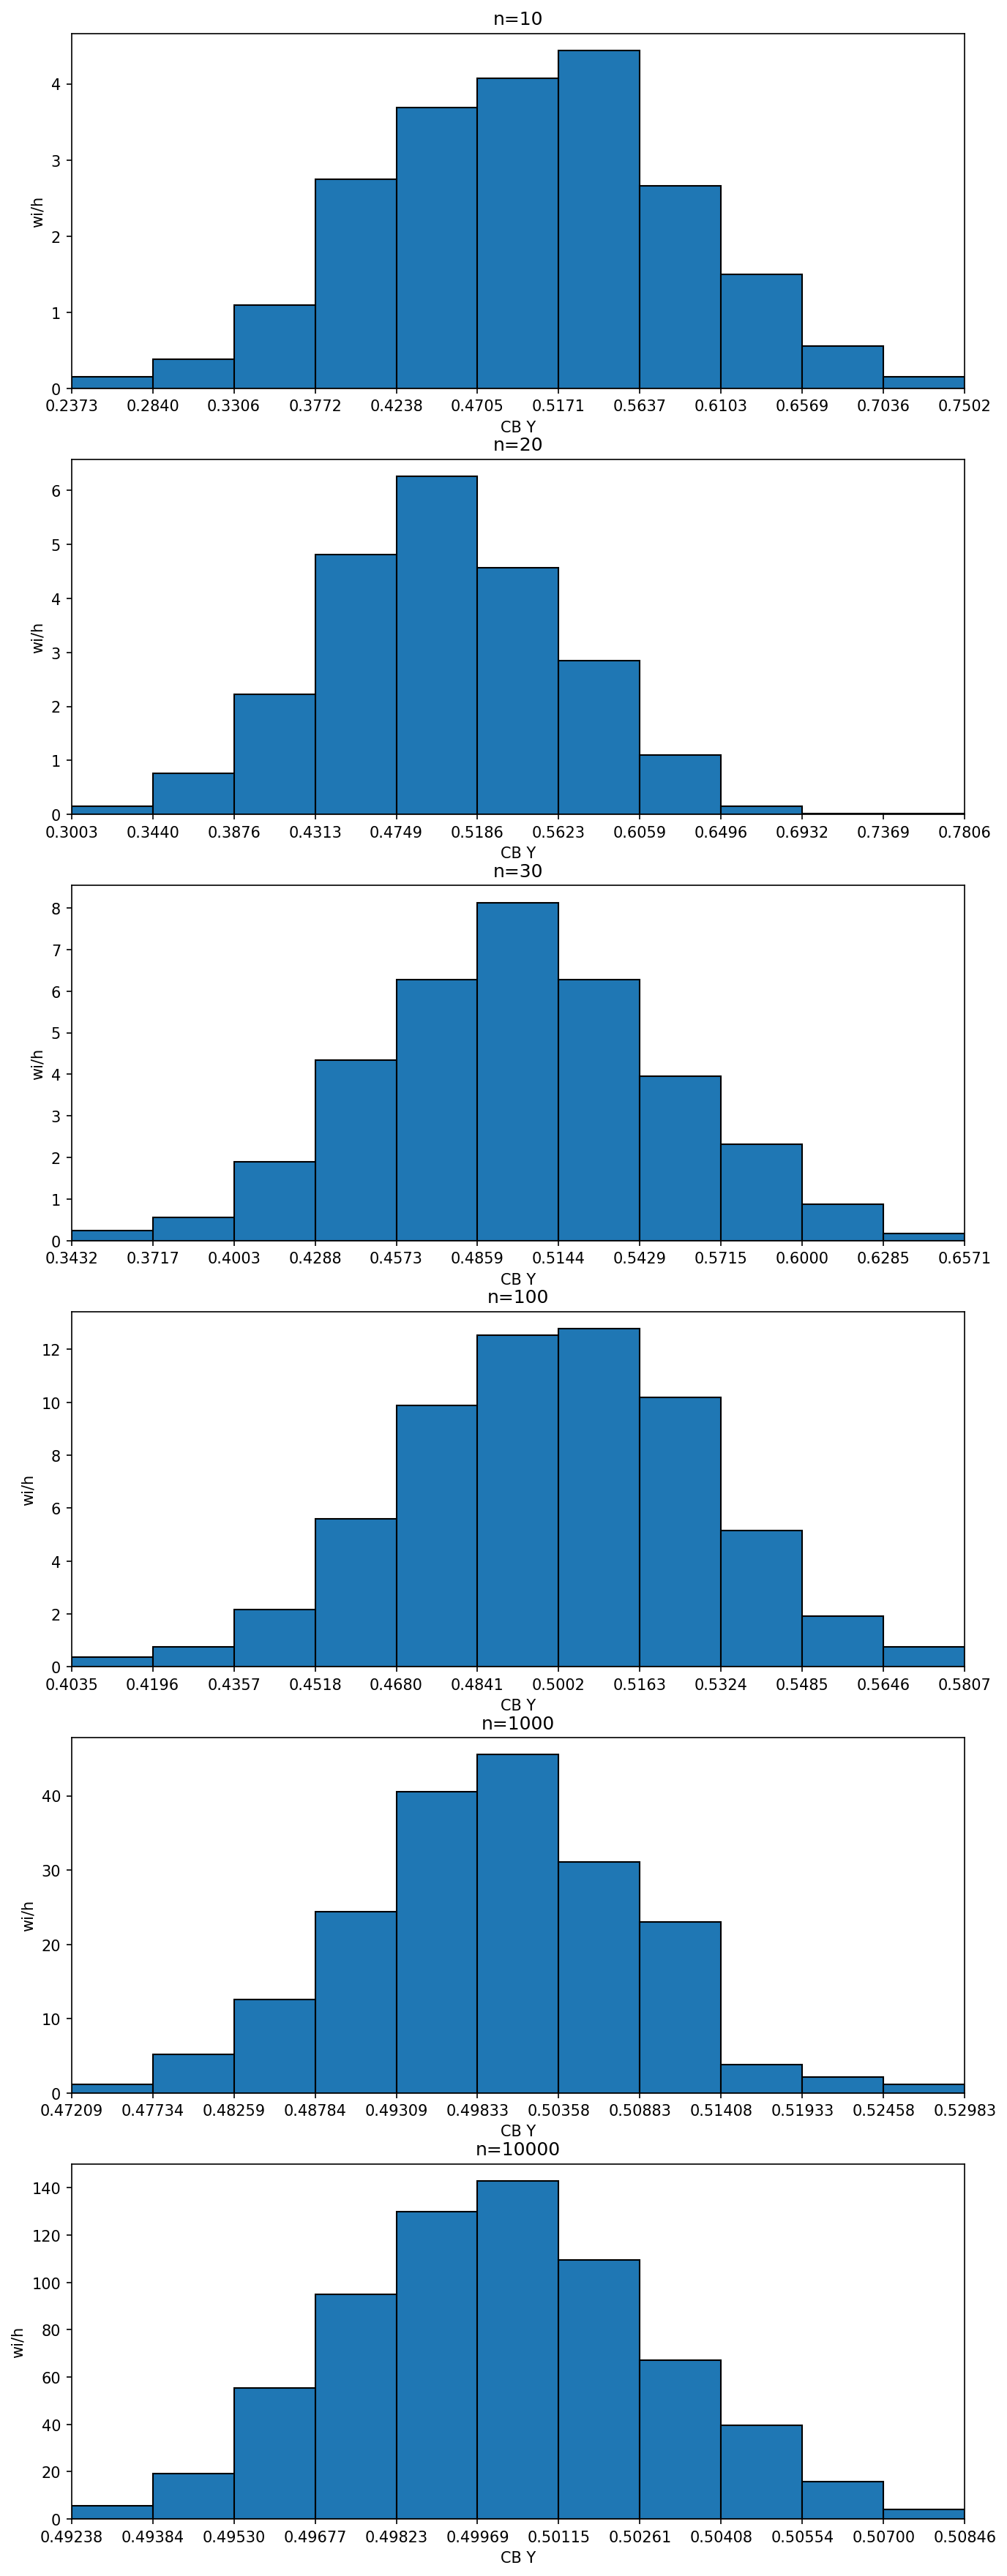

In [23]:
import matplotlib.pyplot as plt
ns = [10, 20, 30, 100, 1000, 10000]
m = 1000
ln_ns = len(ns)
fig, axs = plt.subplots(ln_ns)
fig.set_dpi(150)
fig.set_size_inches(10.5, 5*ln_ns, forward=True)
for i, ax in enumerate(axs):
    mean, dx, delt, delta, xi, hi = CI_U_G(0, 1, ns[i], m)
    xmin = min(xi)
    xmax = max(xi)
    tmean = xmax - xmin
    ax.bar(list(map(lambda x: (xi[x]+xi[x+1])/2, range(len(xi)-1))), hi, delta, edgecolor="black")
    ax.set_xlim(min(xi), max(xi))
    ax.set_xlabel('СВ Y')
    ax.set_ylabel('wi/h')
    ax.set_title('n='+str(ns[i]))
    ax.set_xticks(xi)
#ax.set_yticks([0] + hi)
print("Выводим полученную гистограмму")